In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_csv("D:\placement (2).csv")

In [7]:
df.sample(5)

,cgpa,placement_exam_marks,placed
48,6.29,42.0,0
254,6.70,64.0,0
100,6.56,46.0,0
458,7.13,47.0,0
193,6.31,14.0,0


C:\Users\patel\AppData\Local\Temp\ipykernel_17500\403793784.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\patel\AppData\Local\Temp\ipykernel_17500\403793784.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

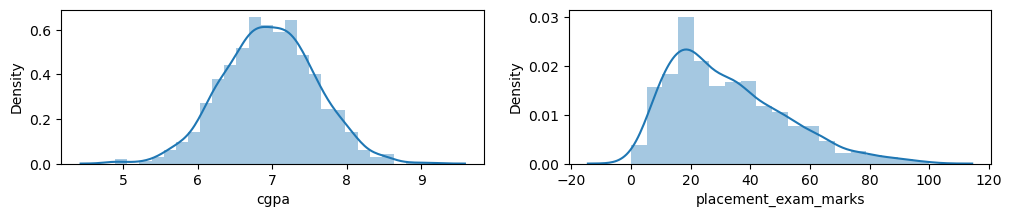

In [9]:
plt.figure(figsize=(12,2))
plt.subplot(121)
sns.distplot(df['cgpa'])

plt.subplot(122)
sns.distplot(df['placement_exam_marks'])

In [25]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [20]:
quantile_75 = df['placement_exam_marks'].quantile(0.75)
quantile_75

44.0

In [21]:
quantile_25 = df['placement_exam_marks'].quantile(0.25)
quantile_25

17.0

In [22]:
iqr = quantile_75 - quantile_25 
iqr

27.0

<Axes: >

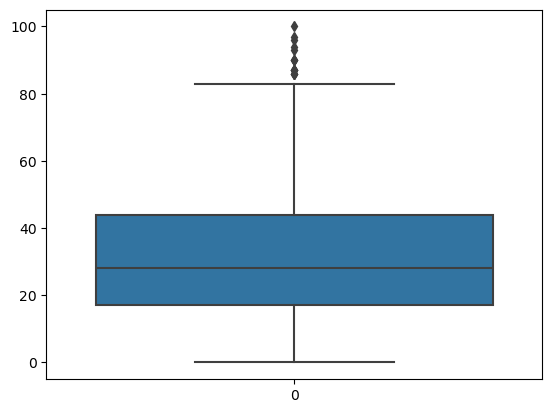

In [23]:
sns.boxplot(df['placement_exam_marks'])

In [27]:
upper_l = quantile_75 +1.5*iqr
upper_l

84.5

In [28]:
lower_l  = quantile_25 - 1.5*iqr
lower_l

-23.5

In [29]:
df[df['placement_exam_marks']>upper_l]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [30]:
df[df['placement_exam_marks']<lower_l]

,cgpa,placement_exam_marks,placed


In [41]:
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks']>upper_l,
    upper_l,
    np.where(
        df['placement_exam_marks']<lower_l,
        lower_l,
        df['placement_exam_marks']
    )
)

In [42]:
df.shape

(1000, 3)